In [1]:
%matplotlib inline
import numpy as np
np.random.seed(123)

import matplotlib.pyplot as plt

import theano 
from theano import tensor as T, function

from IPython import display
import time

In [2]:
noise_var = .5
n_samples = 1000

n = np.random.normal(0, noise_var, n_samples)
x = np.arange(n_samples)
x = (x-x.mean())/x.std()
w, b = np.random.randn(2)

d = w*x + b
y = d+n

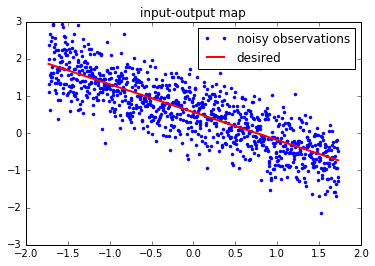

In [3]:
plt.plot(x, y, ".")
plt.plot(x, d, '-r', linewidth=2.)
plt.legend(('noisy observations', 'desired'))
plt.title('input-output map')

In [5]:
X, Y = T.vectors('input', 'desired')
W = theano.shared(0.1)
B = theano.shared(0.)
Z = W*X + B
Cost = ((Y-Z)**2).mean()
params = [W, B]


In [6]:
W.get_value()

array(0.1)

In [7]:
W

<TensorType(float64, scalar)>

In [8]:
updates = ((W, W*2), )
double_w = function([], [], updates=updates)

In [9]:
double_w()
W.get_value()

array(0.2)